Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.
                          PanelOLS Estimation Summary                           
Dep. Variable:                      Y   R-squared:                        0.8137
Estimator:                   PanelOLS   R-squared (Between):              0.8183
No. Observations:                 204   R-squared (Within):               0.8137
Date:                Thu, Dec 19 2024   R-squared (Overall):              0.8183
Time:                        23:13:24   Log-likelihood                    302.77
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      199.77
Entities:                          17   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                   F(4,183)
Min Ob

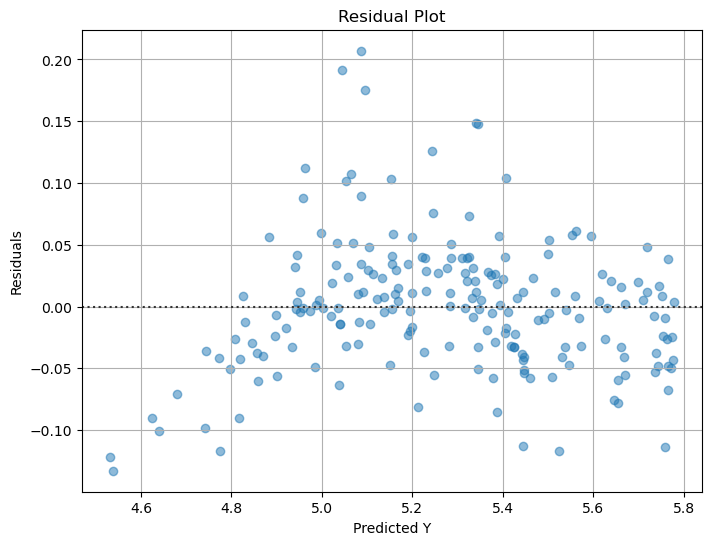

<Figure size 640x480 with 0 Axes>

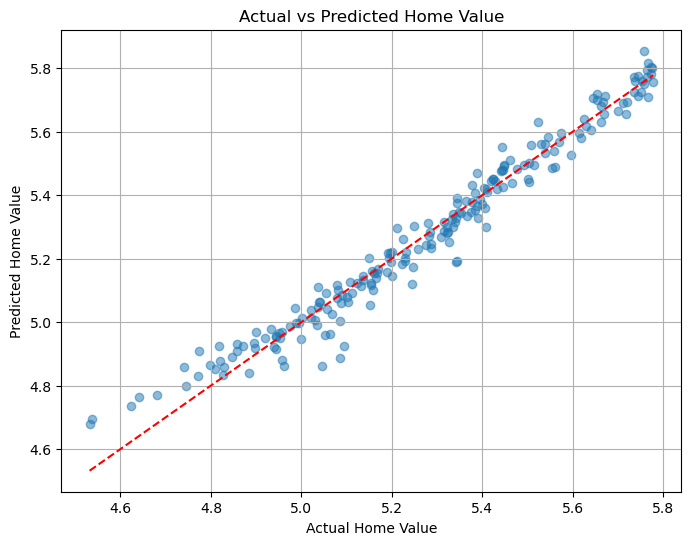

<Figure size 640x480 with 0 Axes>

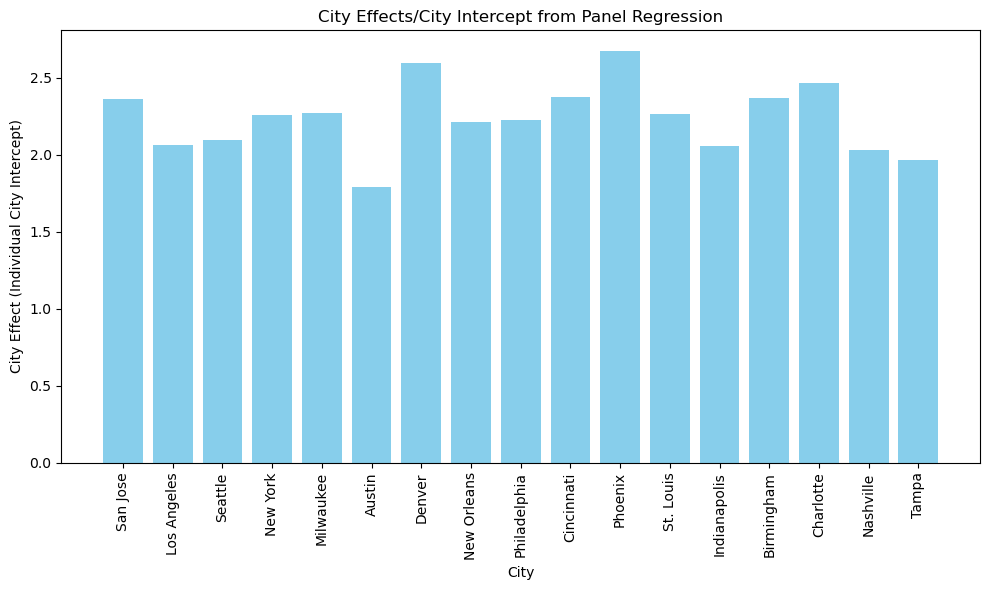

<Figure size 640x480 with 0 Axes>

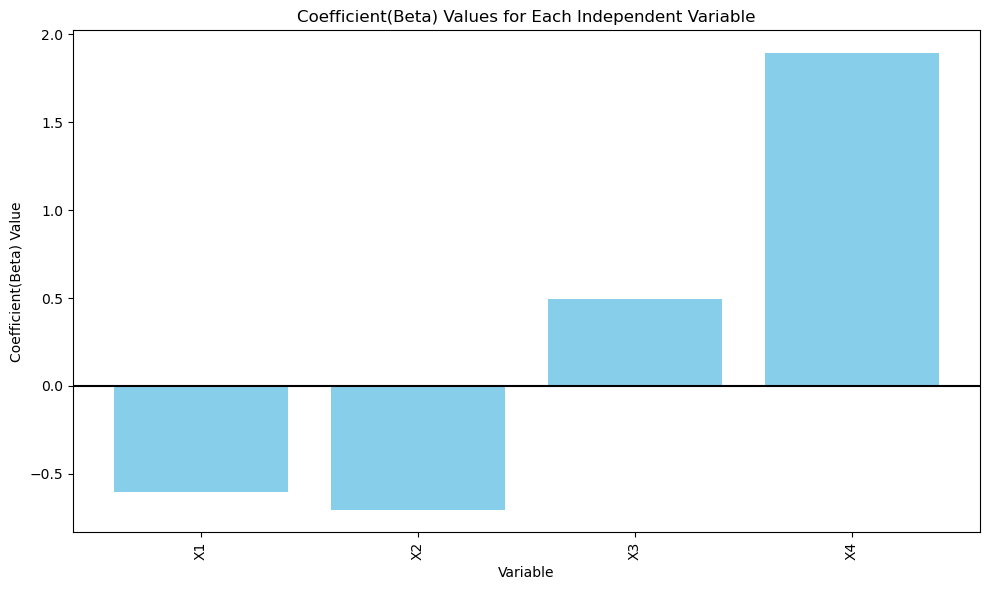

<Figure size 640x480 with 0 Axes>

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pip install pandas linearmodels statsmodels
from linearmodels.panel import PanelOLS
import seaborn as sns


#Load the data from excel 
df = pd.read_csv("Panel_Data.csv")

# Sort the data by the two identifiers,city and year
#Should've already been accomplished in Excel, precautionary
df = df.sort_values(by=['City', 'Time'])

# Set the indicies to both city and time
df = df.set_index(['City', 'Time'])

# Initialize the dependent and independent variables for the panel regression analysis
#Y = Home Value for Current Year
#X1 = 2 year lagged cost of ownership
#X2 = 1 year lagged cost of ownership
#X3 = 2 year lagged cost of rent
#X4 = 1 year lagged cost of rent
y_var = ['Y']
x_vars = ['X1', 'X2', 'X3', 'X4']


#REGRESSION MODEL 1

#Using a fixed effects model and fixing for city effects (entity effects)
model1 = PanelOLS(df[y_var], df[x_vars],entity_effects=True)

#Fit the model
results1 = model1.fit()

#Show results
print(results1)




#PLOTS FOR REGRESSION MODEL 1

# Calculate the residuals and predicted values

#Calculate the residuals
df['Residuals_1'] = results1.resids

#Calculate the Predicted Value of Y
#There was an issue with the fittedvalue property of the results1 panel regression object.
#Through calculatoin, the fittedvalue property only calculated the sum of the coefficients and variables
#and left out the city specific intercept that is present due to fixing city effect
#The residuals are correct, therefore I calculated the predicted y by subtracting the residuals
#from the actual value of y
df['Predicted_Y_1'] = df['Y'] - df['Residuals_1']


# 1. Residual Plot
#Initialize the figure with correct size
plt.figure(figsize=(8, 6))
#I plotted the Residuals against the actual Y values with mid-level transparency 
sns.residplot(x=df['Y'], y=df['Residuals_1'],  scatter_kws={'alpha': 0.5})
#Named title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

#Save figure
plt.savefig('Residual_Plot.png', format='png')

# 2. Plot Y vs Predicted Y 
#Initialize plot with correct size
plt.figure(figsize=(8, 6))
# Scatter plot with actual Y versus predicted Y with mid level transparency so the "perfect fit line" could be visible
plt.scatter(df['Y'], df['Predicted_Y_1'], alpha=0.5)
# Added a "perfect fit" line where predicted Y equals actual Y
plt.plot([df['Y'].min(), df['Y'].max()], [df['Y'].min(), df['Y'].max()], color='red', linestyle='--')

# Named titles and labels
plt.title('Actual vs Predicted Home Value')
plt.xlabel('Actual Home Value')
plt.ylabel('Predicted Home Value')
#Turn grid on and show the plot
plt.grid(True)
plt.show()

#Save figure
plt.savefig('Actual_Y_vs_Predicted_Y', format='png')

#3. Bar Chart of City's Intercepts

# Access the fixed effects (city intercept) for the regression results
fixed_effects = results1.estimated_effects

# Each cities fixed effect will be repeated 12 times, once for every observation of the city
#I only want each city's fixed effect once
#Therefore I created city effects which will store every 12th value starting from
#Index 0, the first value (city effect for San Jose)
city_effects = fixed_effects.iloc[::12].reset_index(drop=True)

# I received error messages pertaining to city_effects not being one dimensional
#and this aspect was required for the bar graph, therefore I used the squeeze property
#to ensure it is one dimensional
city_effects = city_effects.squeeze()  

# Create list of cities in order corresponding to the fixed effects list
cities = ['San Jose', 'Los Angeles', 'Seattle', 'New York', 'Milwaukee', 
          'Austin', 'Denver', 'New Orleans', 'Philadelphia', 'Cincinnati', 
          'Phoenix', 'St. Louis', 'Indianapolis', 'Birmingham', 'Charlotte', 
          'Nashville', 'Tampa']

# Create a Data Frame with cities and corresponding fixed effects
city_effects_df = pd.DataFrame({'City': cities, 'City_Effects': city_effects})

#Initialize a bar chart which correct sizing
plt.figure(figsize=(10, 6))

# Create bar chart
plt.bar(city_effects_df['City'], city_effects_df['City_Effects'], color='skyblue')

# Name the titles and the axes
plt.xlabel('City')
plt.ylabel('City Effect (Individual City Intercept)')
plt.title('City Effects/City Intercept from Panel Regression')

# Rotated the names of the cities so they could be read
plt.xticks(rotation=90)

# Display the plot
#added tight_layout because there were fitting issues
plt.tight_layout()  
plt.show()

#Save figure
plt.savefig('City_Intercepts.png', format='png')


#4. Bar chart of each Coefficients Beta 

#Retrieve the coefficients (Betas) from the results of the panel regression
coefficients = results1.params

betas = [coefficients['X1'], coefficients['X2'], coefficients['X3'], coefficients['X4']]

variables = ['X1', 'X2', 'X3', 'X4']

betas_df = pd.DataFrame({'Variable': variables, 'Beta_Value': betas})

#Initialize a bar chart which correct sizing
plt.figure(figsize=(10, 6))

# Create bar chart
plt.bar(betas_df['Variable'],betas_df['Beta_Value'], color='skyblue')

# Name the titles and the axes
plt.xlabel('Variable')
plt.ylabel('Coefficient(Beta) Value')
plt.title('Coefficient(Beta) Values for Each Independent Variable')

plt.axhline(0, color='black', linewidth=1.5, linestyle='-') 

# Rotated the names of the cities so they could be read
plt.xticks(rotation=90)

# Display the plot
#added tight_layout because there were fitting issues
plt.tight_layout()  
plt.show()

#save figure
plt.savefig('coefficients_bar_chart.png', format='png')